# Gradient descent
Gradient descent is a common technique for optimization and is commonly applied to machine learning. Given some function $f: \mathbb{R}^m \rightarrow \mathbb{R}$, the goal is to find some $x \in \mathbb{R}^m$ such that $f(x)$ is a minimum value of $f$.

## The gradient
Suppose $f$ is differentiable. Then, it has a gradient function $\nabla f: \mathbb{R}^m \rightarrow \mathbb{R}^m$ defined by $\nabla f_i = \frac{\delta f}{\delta x_i}$. A useful property of the gradient is that $\nabla f(x)$ points in the direction of steepest ascent; that is, starting at point $x$, we can move in the direction of $\nabla f(x)$ to maximize $f$.

Even if $f$ is not differentiable, there may exist ways to approximate a gradient.

## Gradient descent algorithm
The goal is to minimize $f$, and $\nabla f(x)$ points in the direction of steepest ascent. So to minimize $f(x)$, we can move $x$ in the direction opposite to $\nabla f(x)$. We can repeatedly move in the direction of $-\nabla f$ until we reach the minimum of $f$, indicated by $\nabla f = 0$. The gradient descent procedure may be illustrated as follows, where $\alpha$ is a constant known as the learning rate:
1. Let $x$ be some arbitrary initial value in $\mathbb{R}^m$.
2. While $\nabla f(x) \neq 0, x \gets x - \alpha \nabla f(x)$.

There are several techniques for selecting the learning rate $\alpha$. Some sophisticated techniques choose a different learning rate for each iteration. For our purposes, we can arbitrarily select some small value such as $\alpha = 0.25$.

In step 2, it can be rare for $\nabla f(x)$ to reach exactly 0 due to computational limits. So we will instead iterate step 2 while $||\nabla f(x)|| > \epsilon$ for some small tolerance $0 < \epsilon << 1$.

In step 2, it may take an unrealistic count of iterations before the gradient descent algorithm converges. So we may choose to terminate the procedure after a certain number of iterations have passed.

We implement gradient descent below:

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import seaborn as sns
import math

def gradient_descent(fun, grad_fun, init_x, learn_rate, epsilon=0.01, max_iterations=10000):
    '''
    Executes gradient descent.
    INPUT
        fun; a function with 1 input representing x, a (n, 1)-shape vector, and 1 output, a scalar value
        grad_fun; the gradient of fun with 1 input representing x, a (n, 1)-shape vector, and 1 output, a (n, 1)-shape vector
        init_x; (n, 1)-shape initial input value to start gradient descent at
        learn_rate; the learning rate
        epsilon; tolerance for convergence of gradient descent
        max_iterations; maximum number of iterations before termination
    RETURNS
        (n, 1)-shape array representing the last value of x, which is the x that minimizes f(x)
        scalar value of input function at the last value of x
        list of traversed x values
        list of traversed f(x) values
    '''
    # set initial x value
    x = init_x
    
    # create lists to store the traveresed x and f(x) values
    x_vals = [x]
    fun_vals = [fun(x)]
    
    # compute initial gradient value
    gradient = grad_fun(x)
    
    # perform gradient descent iterations
    itrs = 0
    while (np.linalg.norm(gradient) > epsilon) and (itrs < max_iterations):
        itrs += 1
        x = x - learn_rate * gradient
        gradient = grad_fun(x)
        x_vals.append(x)
        fun_vals.append(fun(x))
    return x, fun(x), x_vals, fun_vals

## Examples
### Basic example
Consider the function $f(x) = x^2$. Calculus can quickly verify that $\nabla f(x) = 2x$ and that $f$ attains its unique minimum of 0 at $x=0$. A plot is shown below.

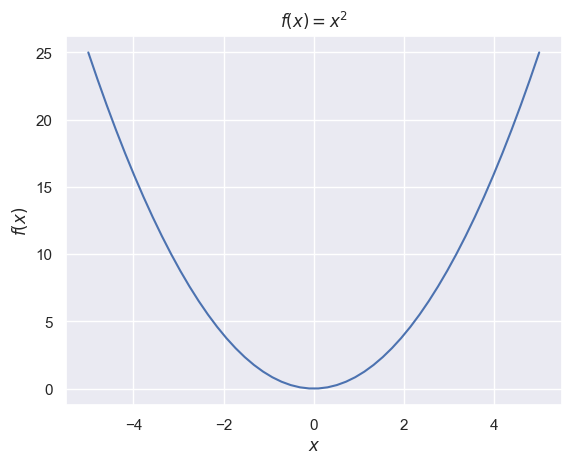

In [2]:
def f0(x):
    '''
    f(x) = x^2
    '''
    return x ** 2

def grad_f0(x):
    '''
    gradient_f(x) = 2x
    '''
    return 2 * x

# Plot f(x)
xdom = np.linspace(-5, 5, 50)
fdom = f0(xdom)

sns.set_theme()
plt.plot(xdom, fdom)
plt.title("$f(x) = x^2$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()

Let's perform gradient descent. Abitrary, let the initial $x$ be 4. Add a scatterplot over the points that gradient descent traverses through to see the iterations in action. Observe that, starting at $x=4$, the gradient descent steadily updates $x$ until $f(x)$ reaches its minimum at $x=0$. The minimum is reached in 11 iterations.

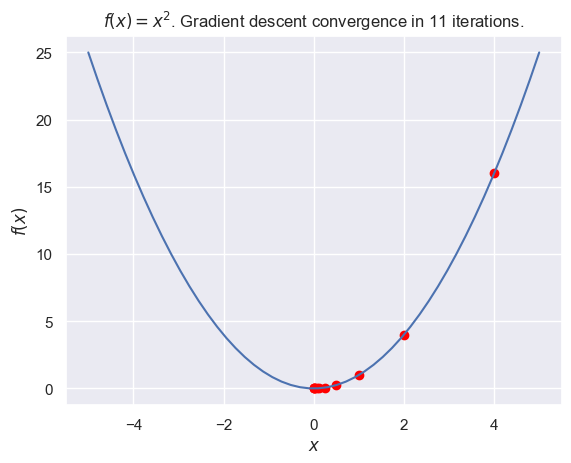

In [3]:
# Run gradient descent
_, _, x_vals, f_vals = gradient_descent(fun=f0,
                                        grad_fun=grad_f0, 
                                        init_x=4, 
                                        learn_rate=0.25)

# Plot the traversal of gradient descent
plt.plot(xdom, fdom)
plt.scatter(x_vals, f_vals, c="red")
plt.title("$f(x) = x^2$. Gradient descent convergence in " + str(len(x_vals))+ " iterations.")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()

## Sensitivity to learning rate
It turns out gradient descent can be extremely sensitive to the learning rate. We used a learning rate of 0.25 in the above example. What happens if we use a different learning rate?

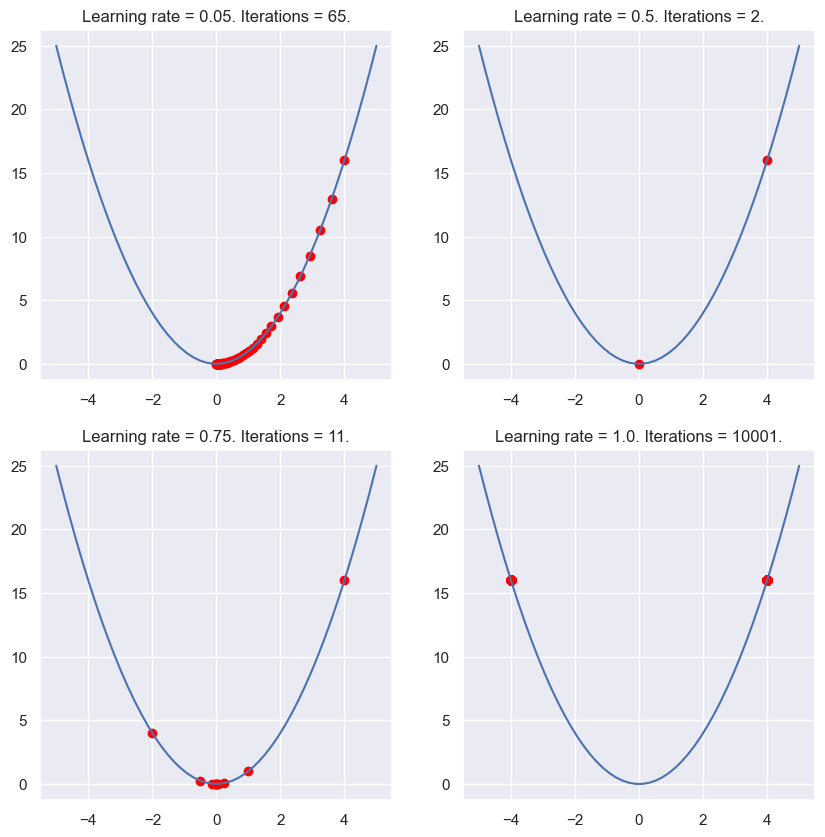

In [4]:
# List of different learning rates to test
learn_rates = [0.05, 0.50, 0.75, 1.0]

# Create subplots of each tested learning rate
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Foreach tested learning rate, perform gradient descent and graph results
for ind in range(len(learn_rates)):
    
    # Do gradient descent
    learn_rate = learn_rates[ind]
    _, _, x_vals, f_vals = gradient_descent(fun=f0,
                                            grad_fun=grad_f0, 
                                            init_x=4, 
                                            learn_rate=learn_rate)
    
    # Graph results
    ax = axs.flat[ind]
    ax.plot(xdom, fdom)
    ax.scatter(x_vals, f_vals, c="red")
    ax.set_title("Learning rate = " + str(learn_rate) + ". Iterations = " + str(len(x_vals)) + ".")

Let's observe the behavior of gradient descent for various learning rates. For a very small learning rate of 0.05, the $x$ value steadily iterates toward the optimal value of $x=0$. There is not a lot of unexpected behavior, but a high count of iterations are computed, so the overall process was more computationally expensive.

For a learning rate of 0.5, we happen to get very lucky, and the gradient descent converges in just 2 iterations. By coincidence, the learning rate allows the $x$ value to land on the optimal $x=0$ very early.

For a moderately high learning of 0.75, we see that the gradient descent "overshoots" a couple times. That is, for some iterations, $x$ is greater than the optimal value of $x=0$, and then $x$ is updated to some value lesser than $x=0$. In other words, the update function overcorrects and causes $x$ to be updated beyond its optimal value. However, the process still converges at the end.

For a high learning rate of 1.0, the algorithm does not converge at all. The update function keeps updating $x = 4$ to $x = -4$ and $x = -4$ to $x = 4$. The algorithm keeps cycling $x$ between $-4$ and $4$. The algorithm only stops once the total number of iterations exceeds the maximum of 10000 that we set.

When using gradient descent to minimize functions, it is important to select a learning rate that is small enough to converge, yet large enough to converge without requiring a large number of iterations.

## Sensitivity to initial value & local minima
Even if gradient descent finds a local minimum, there is no guarantee this local minimum is a global minimum. Consider the function $f(x) = x \sin x$, which has gradient $\nabla f(x) = \sin x + x \cos x$. $f$ has a local minimum at $x=0$, but this is clearly not the global minimum because there are lower minima at $x = -4.91, 4.91$.

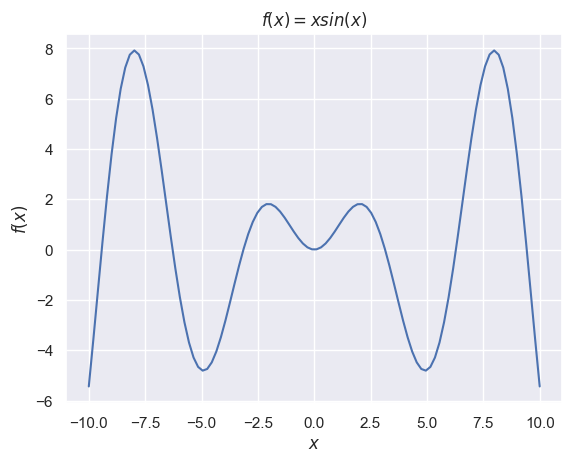

In [5]:
def f1(x):
    '''
    f(x) = x sin(x)
    '''
    return np.multiply(x, np.sin(x))

def grad_f1(x):
    '''
    gradient_f(x) = sin(x) + x cos(x)
    '''
    return np.sin(x) + np.multiply(x, np.cos(x))

# Plot f(x)
xdom = np.linspace(-10, 10, 100)
fdom = f1(xdom)

plt.plot(xdom, fdom)
plt.title("$f(x) = x sin(x)$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()

Let's see what happens when we perform gradient descent, holding the learning rate constant at 0.25 and trying several different initial $x$ values.

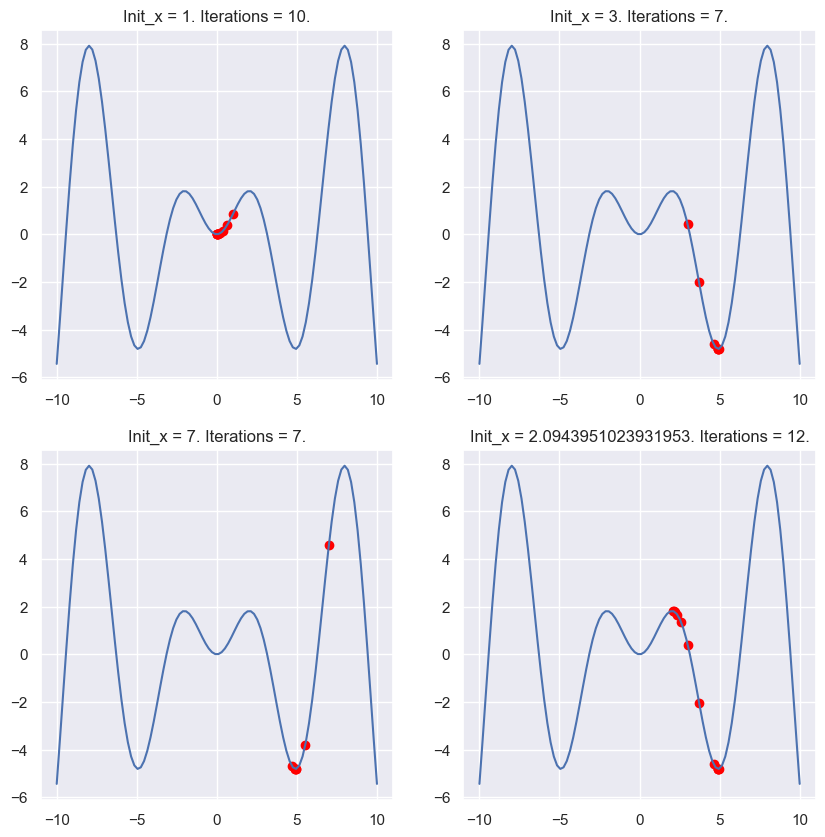

In [6]:
# List of different initial xs to test
init_xs = [1, 3, 7, (2 / 3 * math.pi)]

# Create subplots of each tested learning rate
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Foreach tested initial x, perform gradient descent and graph results
for ind in range(len(learn_rates)):
    
    # Do gradient descent
    init_x = init_xs[ind]
    _, _, x_vals, f_vals = gradient_descent(fun=f1,
                                            grad_fun=grad_f1, 
                                            init_x=init_x, 
                                            learn_rate=0.25)
    
    # Graph results
    ax = axs.flat[ind]
    ax.plot(xdom, fdom)
    ax.scatter(x_vals, f_vals, c="red")
    ax.set_title("Init_x = " + str(init_x) + ". Iterations = " + str(len(x_vals)) + ".")

When the initial $x$ is 1, gradient descent finds a minimum at $x=0$. BUt when the initial $x$ is 3 or 7, then gradient descent finds a minimum at $x=4.91$. Clearly, choice of initial $x$ has an impact on the minimum discovered by gradient descent.

An interesting case arises when intial $x$ is equal to $2 \pi / 3$. At $x = 2 \pi / 3$, $f(x)$ has a local minimum; that is, $\nabla f(x) = 0$ and $f(x)$ looks flat. Here, the gradient descent doesn't know which way to move $x$ because the gradient is zero. A slight change to the value of $x$ in the positive direction may cause gradient descent to move $x$ to the right; similarly,  a slight change to the value of $x$ in the negative direction may cause the gradient descent to move $x$ to the left. The results are highly sensitive to the precise value of the initial $x$ to where even computer rounding errors can influence the gradient descent procedure. In our example, imprecisions in how python computes `sin`, `cos`, and `math.pi` have caused our gradient descent to move $x$ to the right.

## Gradient descent in multiple dimensions
We have provided examples of gradient descent on functions over $\mathbb{R}$, but gradient descent can also be applied to functions over higher dimensions. For example, consider the function $f(x, y) = x^2 + y^4$. Then, $\nabla f(x, y) = (2x, 4y^3)$, and $f(x,y)$ is known to achieve a global minimum at $(x,y)=(0,0)$. If we execute gradient descent with initial value $(x,y)=(3,5)$ and $\alpha=0.25$, we can reach this global minimum.

Text(0.5, 0, '$f(x,y)$')

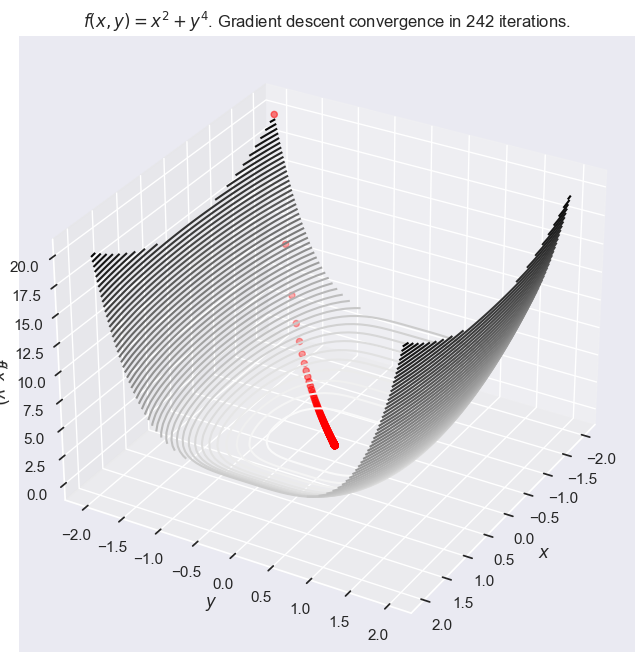

In [7]:
def f2(xy):
    '''
    f(x,y) = x^2 + y^4
    '''
    return xy[:, 0]**2 + xy[:, 1]**4

def grad_f2(xy):
    '''
    grad_f(x,y) = 2x + 4y^3
    '''
    return 2*xy[:, 0] + 4*xy[:, 1]**3

# Create mesh of xy coordinates
xflat = np.linspace(-2, 2, 50) # x range
yflat = np.linspace(-2, 2, 50) # y range
xmesh, ymesh = np.meshgrid(xflat, yflat) # xy mesh

# Compute f(x,y) across xy mesh
xyflat = np.append(np.ndarray.flatten(xmesh).reshape(-1, 1), np.ndarray.flatten(ymesh).reshape(-1, 1), axis=1)
fflat = f2(xyflat)
fmesh = fflat.reshape((50, 50))

# Do gradient descent
init_xy = np.asarray([-2, -2]).reshape(1, 2)
_, _, xy_vals, f_vals = gradient_descent(fun=f2,
                                        grad_fun=grad_f2, 
                                        init_x=init_xy, 
                                        learn_rate=0.01)

# Plot results of gradient descent
x_vals = np.asarray(xy_vals)[:, :, 0]
y_vals = np.asarray(xy_vals)[:, :, 1]
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(xmesh, ymesh, fmesh, 50, cmap='binary')
ax.scatter3D(x_vals, y_vals, f_vals, c="red")
ax.view_init(30, 30)
ax.set_title("$f(x,y) = x^2 + y^4$. Gradient descent convergence in " + str(len(xy_vals))+ " iterations.")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')


## Gradient descent in machine learning
Why do we care so much about gradient descent? In a neural model, the goal is to minimize a cost function, which depends on the weights of each neuron. For instance, our Perceptron implementation in `Perceptron.ipynb` tries to minimize the number of wrong predictions, which depends on the weights and bias of the Perceptron object. Using gradient descent, we can try to find the weights and bias that yield the minimum number of wrong predictions.